In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part I. Polblog dataset

## Q1. Weighted, undirected network

In [2]:
file_edge = './edges_L5.csv'
edges = pd.read_csv(file_edge)
# count duplicated edges
edge_count = edges.groupby(['Source', 'Target'],as_index=False).size()
edge_count
# 19090 rows to 19025 rows

,Source,Target,size
0,0,22,1
1,0,54,1
2,0,84,1
3,0,154,1
4,0,322,1
...,...,...,...
19020,1488,999,1
19021,1488,1007,1
19022,1488,1036,1
19023,1488,1436,1


In [3]:
# careful:
# i-> j is different from j->i. Example:
edge_count[(edge_count['Source'] == 1046) & (edge_count['Target'] == 1324)]
edge_count[(edge_count['Source'] == 1324) & (edge_count['Target'] == 1046)]

,Source,Target,size
13263,1046,1324,2


,Source,Target,size
16837,1324,1046,1


In [4]:
# add up i->j and j->i edge weighting to all edges where "source" always <= "target"        
for i in range(len(edge_count['Target'])):
    if edge_count['Source'][i] < edge_count['Target'][i]:
        m = edge_count['Source'][i]
        n = edge_count['Target'][i]
        # look for reversed direction weighting
        x = edge_count[(edge_count['Source'] == n) & (edge_count['Target'] == m)]
        if x.empty == False:
            re = x['size'].item()
            # calculate sum
            s = edge_count['size'][i] + re
            edge_count['size'][i] =s
            #print(i, m, n, re, s)
        
# slice for edges where "Source" <= "Target", avoid repetition of counting
edge_sum = edge_count[edge_count['Source'] <= edge_count['Target']]
edge_sum

,Source,Target,size
0,0,22,1
1,0,54,1
2,0,84,1
3,0,154,1
4,0,322,1
...,...,...,...
18661,1458,1478,2
18670,1459,1478,2
18735,1460,1462,1
18736,1460,1477,1


In [5]:
G = nx.from_pandas_edgelist(edge_sum, 'Source', 'Target', create_using=nx.Graph(), edge_attr='size')
nx.info(G)
nx.is_directed(G)

'Graph with 1107 nodes and 9520 edges'

False

A weighted undirected graph of Polblog network consists of 1107 nodes and 9520 edges.

## Q2. Weighted, directed network

In [6]:
file_edge = './edges_L5.csv'
edges = pd.read_csv(file_edge)
# count duplicated edges
edge_dups = edges.groupby(['Source', 'Target'],as_index=False).size()
edge_dups
# 19090 rows to 19025 rows

,Source,Target,size
0,0,22,1
1,0,54,1
2,0,84,1
3,0,154,1
4,0,322,1
...,...,...,...
19020,1488,999,1
19021,1488,1007,1
19022,1488,1036,1
19023,1488,1436,1


In [7]:
edge_weighted_list = edge_dups.values.tolist()

Note: using from_pandas_edgelist will override some edges. no. of edges 19025 -> 16718.

In [8]:
G_d = nx.DiGraph()

G_d.add_weighted_edges_from(edge_weighted_list)

nx.info(G_d)
nx.is_directed(G_d)

'DiGraph with 1224 nodes and 19025 edges'

True

A weighted directed graph of Polblog network consists of 1224 nodes and 19025 edges.

# Part II. Bipartite network analysis

## Q3. Network construction and descriptive data

In [9]:
from networkx.algorithms import bipartite

# Add nodes with the node attribute "bipartite"
file_node = './nodes_L7.csv'
nodes = pd.read_csv(file_node)
nodes

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
0,0,53,1,ACHILIDAE1 (Ach. : Hem. ),NaN,NaN,"array([-0.56541095, -2.76309565])"
1,1,1,0,NaN,Acer,rufinerve,"array([-0.1164353 , -2.07462624])"
2,2,2,0,NaN,Adenocaulon,himalaicum,"array([-0.12344886, -2.43315122])"
3,3,3,0,NaN,Aesculus,turbinata,"array([-0.14942567, -2.65879824])"
4,4,4,0,NaN,Agrimonia,pilosa,"array([-0.1462946 , -2.48239974])"
...,...,...,...,...,...,...,...
767,767,675,1,LUSIIDAE1 (Clu. : Dip. ),NaN,NaN,"array([-0.4119717 , -2.51722849])"
768,768,676,1,Lasioglossum (El.) aff (Hal. : Hym ),NaN,NaN,"array([-0.40843003, -2.83585683])"
769,769,677,1,Camponotus sp. (For. : Hym. ),NaN,NaN,"array([-0.36137743, -1.97689426])"
770,770,678,1,Andrena sp. (And. : Hym. ),NaN,NaN,"array([-0.23316587, -2.03744439])"


In [10]:
# split into two node_set
node_insect = nodes[nodes['pollinator'] == 1]
#node_insect 679
node_plant = nodes[nodes['pollinator'] == 0]
#node_plant 93

G1 = nx.Graph()

G1.add_nodes_from(node_insect["# index"], bipartite=1)
G1.add_nodes_from(node_plant["# index"], bipartite=0)

nx.info(G1)

'Graph with 772 nodes and 0 edges'

In [11]:
# add weighted edges
file_edge = "./edges_L7.csv"
edges = pd.read_csv(file_edge)
edge_weighted_list = edges.values.tolist()
edges

G1.add_weighted_edges_from(edge_weighted_list)

nx.info(G1)
nx.is_bipartite(G1)
nx.is_directed(G1)

,# source,target,count
0,0,40,1
1,94,34,1
2,95,12,1
3,95,39,1
4,96,55,1
...,...,...,...
1201,767,31,3
1202,768,41,1
1203,769,12,1
1204,770,12,1


'Graph with 772 nodes and 1206 edges'

True

False

In [12]:
# index of plant nodeset
node_set_plant = {n for n, d in G1.nodes(data=True) if d["bipartite"] == 0}
# index of insect nodeset
node_set_insect = {n for n, d in G1.nodes(data=True) if d["bipartite"] == 1}

## Q4. Degree 

In [13]:
degX, degY = bipartite.degrees(G1, node_set_plant)
deg_insect = dict(degX)
deg_plant = dict(degY)

# highest degree
max(deg_insect.values())
# insect with highest degree
max(deg_insect, key=deg_insect.get)
# get node info
nodes[nodes["# index"]==196]

# highest degree
max(deg_plant.values())
# plant with highest degree
max(deg_plant, key=deg_plant.get)
# get node info
nodes[nodes["# index"]==12]


25

196

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
196,196,669,1,Bombus (Diversobombus) diversus diversus (Api....,NaN,NaN,"array([-0.11829727, -2.59203444])"


189

12

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
12,12,12,0,NaN,Anthriscus,aemula,"array([-0.39090413, -2.13981384])"


## Q5. Common neighbors of insects - competiveness

In [14]:
max_common_neighbor = 0

for u in node_set_insect:
    for v in node_set_insect:
        if u != v:
            if  max_common_neighbor < len(sorted(nx.common_neighbors(G1, u, v))):
                max_common_neighbor = len(sorted(nx.common_neighbors(G1, u, v)))
                max_u = u
                max_v = v
                #print(u,v, max_common_neighbor)

max_common_neighbor
max_u
max_v

# get node info
nodes[nodes["# index"]==max_u]
nodes[nodes["# index"]==max_v]


10

196

198

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
196,196,669,1,Bombus (Diversobombus) diversus diversus (Api....,NaN,NaN,"array([-0.11829727, -2.59203444])"


,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
198,198,671,1,Bombus (Thoracobombus) honshuensis (Api. : Hym. ),NaN,NaN,"array([-0.18228285, -2.61757552])"


## Q6. Projection

In [15]:

G1_insect = bipartite.weighted_projected_graph(G1,node_set_insect)
nx.info(G1_insect)

#pos = nx.spring_layout(G1_insect)
#nx.draw_networkx(G1_insect, pos = pos)

G1_plant = bipartite.weighted_projected_graph(G1,node_set_plant)
nx.info(G1_plant)

#pos = nx.spring_layout(G1_plant)
#nx.draw_networkx(G1_plant, pos = pos)

'Graph with 679 nodes and 31443 edges'

'Graph with 93 nodes and 1345 edges'

## Q7. Degree centrality

In [24]:
# insects
# highest degree centrality
max(nx.degree_centrality(G1_insect).values())
# insect with highest degree centrality
max(nx.degree_centrality(G1_insect), key=nx.degree_centrality(G1_insect).get)
# get node info
nodes[nodes["# index"]==398]

# plants
# highest degree centrality
max(nx.degree_centrality(G1_plant).values())
# plant with highest degree centrality
max(nx.degree_centrality(G1_plant), key=nx.degree_centrality(G1_plant).get)

# get node info
nodes[nodes["# index"]==90]

0.7168141592920354

398

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
398,398,210,1,Eristalis cerealis (Syr. : Dip. ),NaN,NaN,"array([-0.28188495, -2.50344515])"


0.7826086956521738

90

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
90,90,90,0,NaN,Weigela,hortensis,"array([-0.20496239, -2.41017397])"


## Q8. Isolated nodes

In [17]:
#list(nx.isolates(G1))

list(nx.isolates(G1_insect))

list(nx.isolates(G1_plant))

[586]

[17, 29, 80]

## Q9. Cluster Analysis

This part is done in Gephi and shown in the report.

## Q10. Degree assortativity coefficient

In [18]:
from networkx.algorithms.assortativity import *
degree_assortativity_coefficient(G1_insect)
degree_assortativity_coefficient(G1_plant)


0.1497355073187676

-0.15103115294930522

## Q11. Visualisation

Visualsation is perfromed in Gephi and can be found in the report.

# Part III. Bonus

In [21]:
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['BSDS3002','BSDS3001','BSDS3003'],bipartite=0)
B.add_nodes_from(['John','Arthur','Ben','Jasmine','Jack','Yvonne'],bipartite=1)
B.add_edges_from([('BSDS3002','John'),('BSDS3001','John'),('BSDS3003','John'),('BSDS3001','Arthur'),('BSDS3003','Arthur')\
                 ,('BSDS3003','Ben'),('BSDS3002','Jack'),('BSDS3002','Yvonne'),('BSDS3002','Jasmine'),('BSDS3003','Jasmine')\
                 ,('BSDS3001','Jasmine'),('BSDS3003','Jack')])


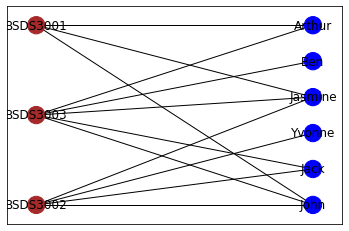

In [22]:
pos = nx.bipartite_layout(B,('BSDS3001','BSDS3002','BSDS3003'))

Class = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}

nx.draw_networkx(B,node_color = ['brown' if j[1]['bipartite']==0 else 'blue' for j in B.nodes(data=True)],pos=pos)

Set the label position of "class" nodes to the left of the red nodes, and the labels of the students to the right of the nodes.

{'BSDS3002': Text(-1.7, -0.5625, 'BSDS3002'),
 'BSDS3001': Text(-1.7, 0.5625, 'BSDS3001'),
 'BSDS3003': Text(-1.7, -2.0816681711721685e-17, 'BSDS3003'),
 'John': Text(0.85, -0.5625, 'John'),
 'Arthur': Text(0.85, 0.5625, 'Arthur'),
 'Ben': Text(0.85, 0.3375, 'Ben'),
 'Jasmine': Text(0.85, 0.11250000000000009, 'Jasmine'),
 'Jack': Text(0.85, -0.33749999999999997, 'Jack'),
 'Yvonne': Text(0.85, -0.11249999999999999, 'Yvonne')}

(-2.0835, 1.1835)

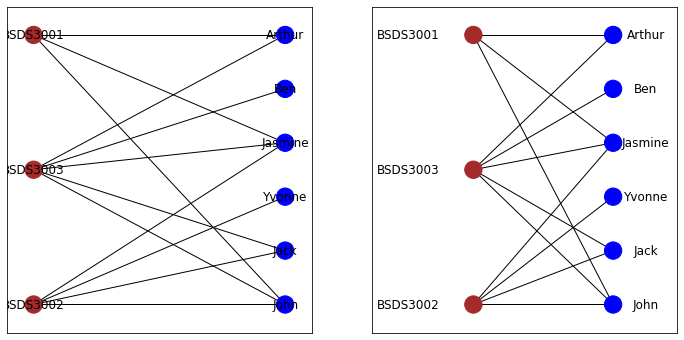

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def nudge(pos, x_shift, y_shift):
    return {n:(x * x_shift, y + y_shift) for n,(x,y) in pos.items()}

pos = nx.bipartite_layout(B,('BSDS3001','BSDS3002','BSDS3003'))
pos_nodes = nudge(pos, 1.7, 0)                              # shift the layout

fig, ax = plt.subplots(1,2,figsize=(12,6))
# default labeling
nx.draw_networkx(B,node_color = ['brown' if j[1]['bipartite']==0 else 'blue' for j in B.nodes(data=True)],pos=pos,ax=ax[0]) 
# default nodes and edges
nx.draw_networkx(B,node_color = ['brown' if j[1]['bipartite']==0 else 'blue' for j in B.nodes(data=True)],pos=pos, with_labels=False, ax=ax[1])   
# nudged labels
nx.draw_networkx_labels(B, pos=pos_nodes, ax=ax[1])        
# expand plot to fit labels
ax[1].set_xlim(tuple(i*1.8 for i in ax[1].get_xlim()))     
plt.show()